# Problem Statement No. 01
Consider the “Academic performance” dataset of students (Academic_Performance_Dataset.csv) and perform the
following operations using Python.
1) Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any
of the suitable techniques to deal with them.
2) Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
3) Apply data transformations on categorical variables to convert it into numerical variables.
Reason and document your approach properly.

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [31]:
df=pd.read_csv(r"D:\OneDrive\Desktop\Desktop\New folder\Datasets\Academic_Performance.csv")
df.head()

,STUDENT_ID,GENDER,PLACEMENT,HONOR_OPTED_OR_NOT,EDUCATION_TYPE,ACADEMIC_PROGRAM,COURSE 1 MARKS,COURSE 2 MARKS,COURSE 3 MARKS,COURSE 4 MARKS,COURSE 5 MARKS,PERCENTILE,OVEARLL_GRADE
0,SB11201210000129,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,71.0,93.0,71.0,93.0,79.0,91,FIRST CLASS
1,SB11201210000137,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,97.0,38.0,86.0,98.0,78.0,92,THIRD CLASS
2,SB11201210005154,M,No,Yes,ACADEMIC,ELECTRONIC ENGINEERING,17.0,1.0,18.0,43.0,22.0,7,DISTINCTION
3,SB11201210007504,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,65.0,35.0,76.0,80.0,48.0,67,FIRST CLASS
4,SB11201210007548,M,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,94.0,94.0,98.0,100.0,71.0,98,FIRST CLASS


In [32]:
df.isnull().sum()

STUDENT_ID             0
GENDER                22
PLACEMENT             15
HONOR_OPTED_OR_NOT    14
EDUCATION_TYPE        15
ACADEMIC_PROGRAM      34
COURSE 1 MARKS        11
COURSE 2 MARKS         8
COURSE 3 MARKS        14
COURSE 4 MARKS        14
COURSE 5 MARKS        22
PERCENTILE             0
OVEARLL_GRADE          0
dtype: int64

In [33]:
num=["COURSE 1 MARKS","COURSE 2 MARKS","COURSE 3 MARKS","COURSE 4 MARKS","COURSE 5 MARKS"]
cat=["GENDER","PLACEMENT","HONOR_OPTED_OR_NOT","EDUCATION_TYPE","ACADEMIC_PROGRAM"]
for i in num:
    df[i].fillna(0,inplace=True)
for i in cat:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [34]:
df.isnull().sum()

STUDENT_ID            0
GENDER                0
PLACEMENT             0
HONOR_OPTED_OR_NOT    0
EDUCATION_TYPE        0
ACADEMIC_PROGRAM      0
COURSE 1 MARKS        0
COURSE 2 MARKS        0
COURSE 3 MARKS        0
COURSE 4 MARKS        0
COURSE 5 MARKS        0
PERCENTILE            0
OVEARLL_GRADE         0
dtype: int64

<Axes: >

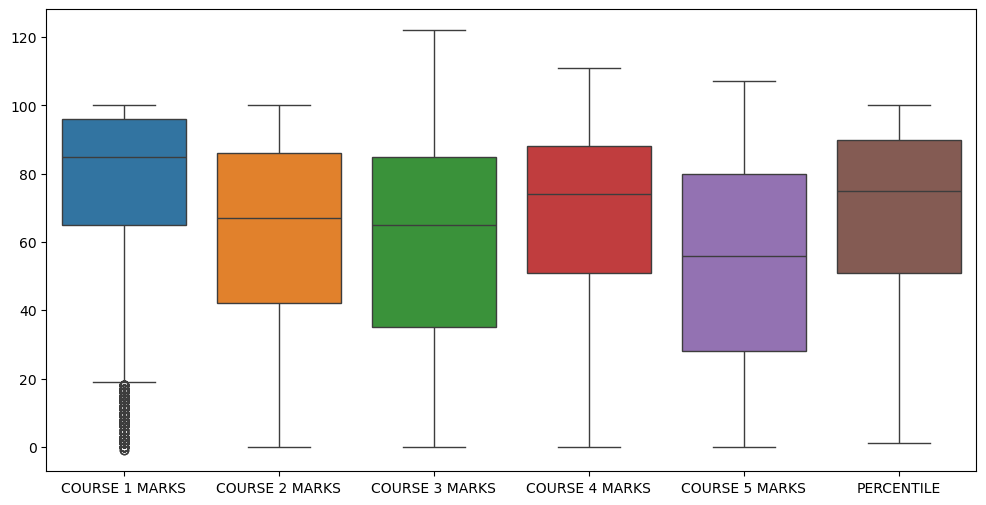

In [35]:
plt.figure(figsize=(12,6))
sns.boxplot(df)

In [36]:
q1=df["COURSE 1 MARKS"].quantile(0.25)
q3=df["COURSE 1 MARKS"].quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
df["COURSE 1 MARKS"]=np.where(df["COURSE 1 MARKS"]<lower,lower,df["COURSE 1 MARKS"])
df["COURSE 1 MARKS"]=np.where(df["COURSE 1 MARKS"]>upper,upper,df["COURSE 1 MARKS"])

<Axes: >

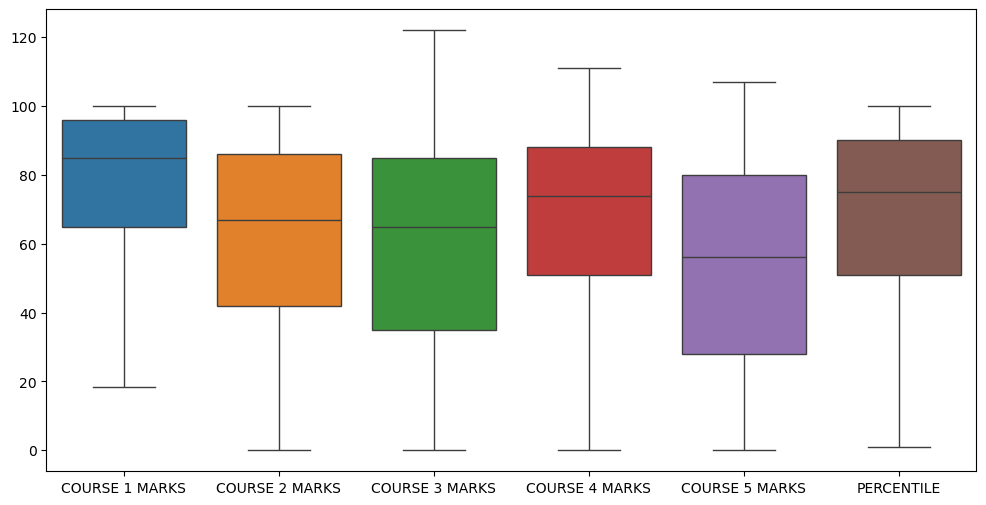

In [37]:
plt.figure(figsize=(12,6))
sns.boxplot(df)

In [38]:
en=LabelEncoder()
for i in cat:
    df[i]=en.fit_transform(df[i])

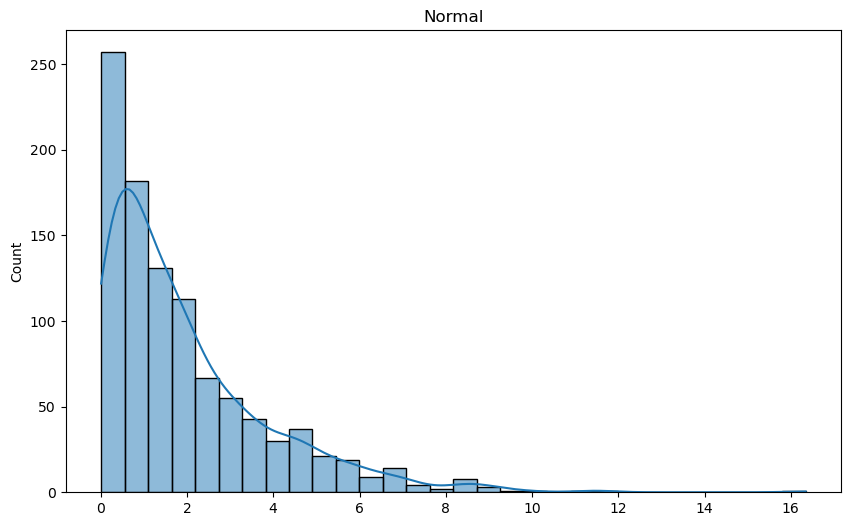

In [42]:
np.random.seed(42)
skewed=np.random.exponential(scale=2,size=1000)
def histplot(title,data):
    plt.figure(figsize=(10,6))
    plt.title(title)
    sns.histplot(data=data,bins=30,kde=True)
    plt.show()
histplot("Normal",skewed)

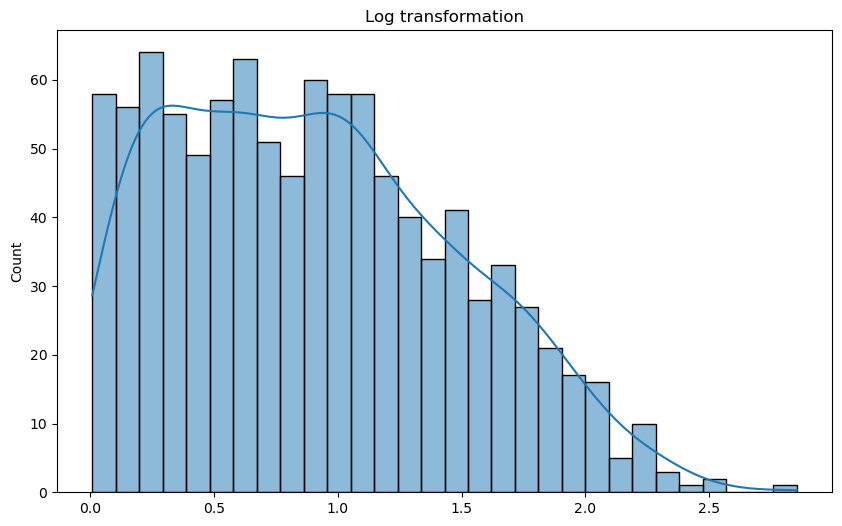

In [43]:
log=np.log1p(skewed)
histplot("Log transformation",log)


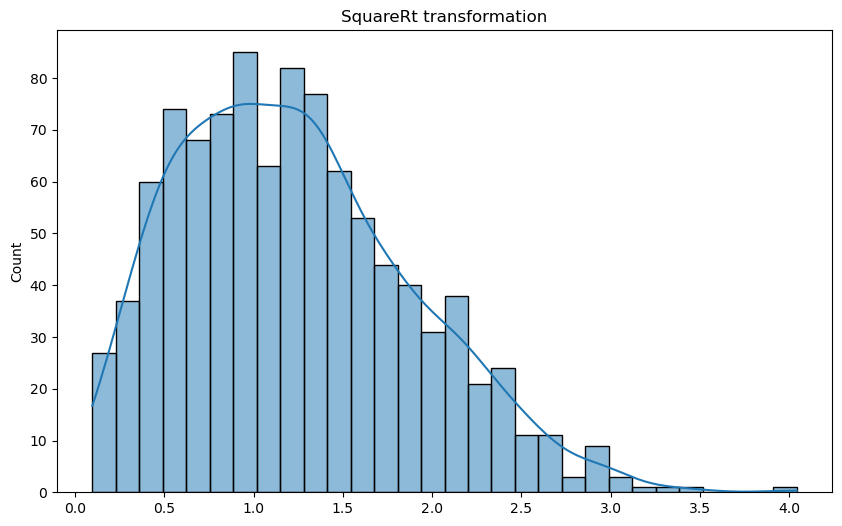

In [44]:
sq=np.sqrt(skewed)
histplot("SquareRt transformation",sq)

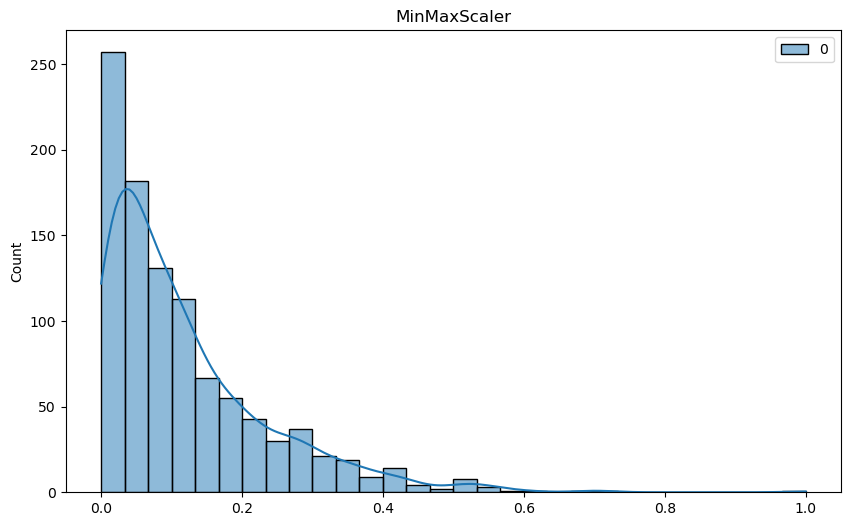

In [46]:
m=MinMaxScaler()
sc=m.fit_transform(skewed.reshape(-1,1))
histplot("MinMaxScaler",sc)